## <center> Breast Cancer Classification </center>

<b>Problem statement: </b> In this project we are going to classify patients abnormal mass of cells (tumors). Tumors can either be benign (non-cancerous) or malignant (cancerous).Benign tumors are generally not harmful but if a patient is diagnosed with a malignant tumor then they should be given treatment immediately. This is a classification problem with two classes to predict. We will start with logistic regression as our model and eventually select the best model for our dataset.


An Otsogile Ogaisitse Onalepelo aka Morena project.


### Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection & Processing

In [2]:
# load the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#check the feature names
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# load the data into a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [8]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
# print number of rows and columns in the dataset
data_frame.shape

(569, 31)

we have 569 rows and 31 columns in our data

In [10]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

It appears we do not have any missing values in our data. All our features have float64 data type other than the target feature .i.e. label which have an int32 data type. We also do not have any categorical features

In [11]:
# checking for missing values again
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

Yaay!😃😃 We really do not have any missing values

In [12]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Hmmm....The following features have very huge values while others have small values.

-mean radius

-mean texture

-mean perimeter

-mean area

-worst texture

-worst perimeter

-worst area

-area error

-worst radius

We are going to have to scale them in a bit so we have values in our dataset within a common range.

In [13]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

There is also an imbalance in our classes. We have more benign observations with 357 compared to 212 for malignant. This is another problem we have to resolve.

In [14]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Feature Engineering

### Feature Scalling

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']


scaler = MinMaxScaler()
data_frame[cols_to_scale] = scaler.fit_transform(data_frame[cols_to_scale])
data_frame.describe()

Nice! Nice!. I really love what i am looking at here..😍. Now we have our feature values ranging from 0 to 1,some just a few points above 1 and others below but not by much. Which is better compared to how they were initially.

<b>EDIT: <b/> It turns our our model actually performs better on scaled data however there is a slight hiccup. Making predictions from a React Js and React Native client turns out to be challenging. The predictions made are flawed if the data is  not scaled and when we scale user inputs another problem brews. The inputs get distorted as they are now taken as a single column not a row when scalling them. Hence, I decided to just train the model on unscaled data and to not run the above code.

### Handling Dataset Imbalance

Training a model on an imbalanced dataset might result in our model not performing as per our expectations. Therefore, before we go any further with our data preprocessing. Let us handle this imbalance first. There are various techniques we could utilize to accomplish this like, undersampling the majority class, oversampling the minority class, ensenble method and SMOTE. For this pipeline we will oversample the minority class.

In [16]:
# Class count
count_class_1, count_class_0 = data_frame.label.value_counts()

# Divide by class
df_class_0 = data_frame[data_frame['label'] == 0]
df_class_1 = data_frame[data_frame['label'] == 1]

# Oversample 0-class and concat the DataFrames of both classes
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)


print('Random over-sampling:')
print(df_test_over.label.value_counts())

Random over-sampling:
1    357
0    357
Name: label, dtype: int64


Bravooo 👏👏. Our classes are now perfectly balanced. 

### Outlier Detection and Removal

We kind of have the curse of dimensionality in this dataset therefore, using traditional and statistical outlier detection methods is slightly not practical. We will have to go over each feature and analyse it. Thus, we will use a automatic outlier detection and removal technique specifically One Class SVM.


For more information on automatic outlier detection methods read more here: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/. Some code used here in is kind of borrowed from there.😆😅

In [17]:
from sklearn.svm import OneClassSVM

# retrieve the array
data = df_test_over.values
# split into input and output elements to prevent over fitting and data leakage
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
#The class provides the “nu” argument that specifies a approx ratio of outliers in the dataset, default = 0.1
ocs = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01)
yhat = ocs.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(499, 30) (499,)
(324, 30) (324,)


Okay! So, different nu values detects and removes a different number of outliers in our dataset which might change our class value counts as well. Maybe we should have balanced the dataset after removing outliers? 🤔🤔🤔.Probably!! Anyhow, lets leave it as it is and proceed to feature selection.

### Feature Selection

We have 30 features in our dataset. Some of them might actually be very important for building our model. Therefore let us use mutual information to detect the most important features and select them for our model.


#### Mutual Information  (MI)

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency between variables.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [18]:
#import the library that we will be using to do feature selection using mutual information for classification problems
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.46351411, 0.21546435, 0.48162812, 0.4832702 , 0.1728233 ,
       0.3104849 , 0.3879166 , 0.52037098, 0.19212447, 0.12486569,
       0.35016369, 0.17141567, 0.38499358, 0.48779367, 0.16641495,
       0.134671  , 0.20499353, 0.21923689, 0.12317525, 0.17953063,
       0.53887921, 0.20771784, 0.53058323, 0.53254539, 0.18613407,
       0.31408895, 0.37991203, 0.4629573 , 0.2350373 , 0.17122311])

With the mutual info class you never get back any negative values. If you get a very high value, then it means that feature dependency on the target variable is too much and which ever features have high values are the most important features.

In [19]:
#convert the mutual information array into a series so we can see which value belongs to which feature.
mutual_info = pd.Series(mutual_info)
mutual_info.index = breast_cancer_dataset.feature_names
mutual_info.sort_values(ascending=False)

worst radius               0.538879
worst area                 0.532545
worst perimeter            0.530583
mean concave points        0.520371
area error                 0.487794
mean area                  0.483270
mean perimeter             0.481628
mean radius                0.463514
worst concave points       0.462957
mean concavity             0.387917
perimeter error            0.384994
worst concavity            0.379912
radius error               0.350164
worst compactness          0.314089
mean compactness           0.310485
worst symmetry             0.235037
concave points error       0.219237
mean texture               0.215464
worst texture              0.207718
concavity error            0.204994
mean symmetry              0.192124
worst smoothness           0.186134
fractal dimension error    0.179531
mean smoothness            0.172823
texture error              0.171416
worst fractal dimension    0.171223
smoothness error           0.166415
compactness error          0

This tells us that worst area has the highest dependency on our target variable followed by worst perimeter etc. Its not always necessary that you should take all the features for your model. You can take the top 10 or 20 features and drop others.

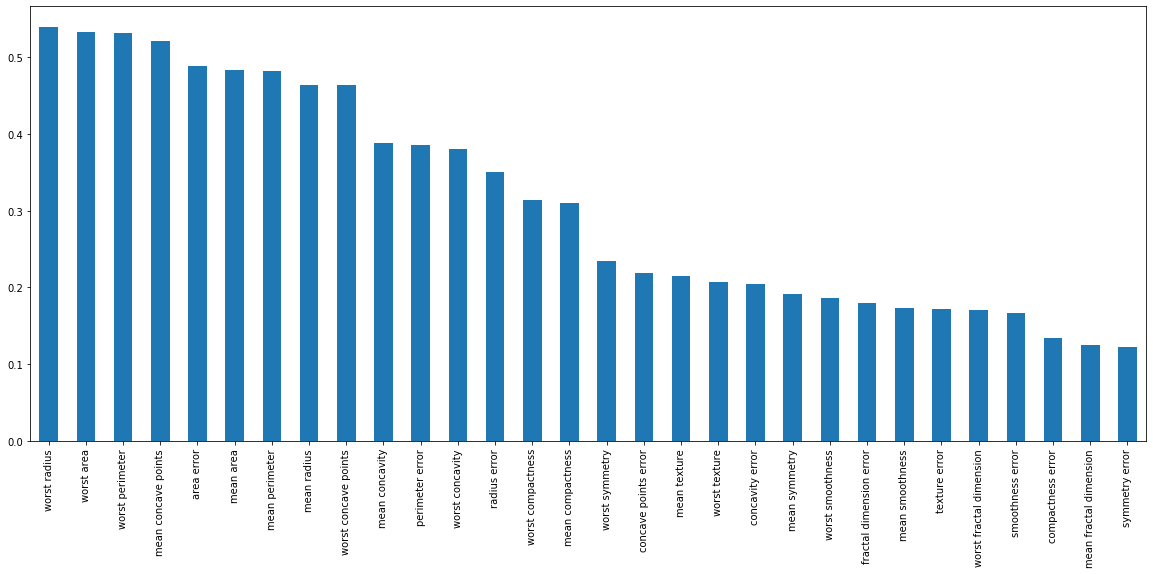

In [20]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [21]:
#this module allows us to select our desired features per the percentage or criteria we want e.g. top 10, top 10%, top 10 percentile of the features etc
#this is also usually determied by the number of features in our dataset
from sklearn.feature_selection import SelectKBest

#Now we Will select the  top 20 features
#To avoid overfitting and data leak. We only do this process for X  and y Train
sel_twenty_cols = SelectKBest(mutual_info_classif, k=20)
sel_twenty_cols.fit(X_train, y_train)
#display the top 20features we can use for our model building
breast_cancer_dataset.feature_names[sel_twenty_cols.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='<U23')

In [23]:
top_twenty_features = breast_cancer_dataset.feature_names[sel_twenty_cols.get_support()]

In [24]:
top_twenty_features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='<U23')

In [25]:
#put X_train and X_test back into dataframes for feature selection
X_train_df =pd.DataFrame(X_train,columns=breast_cancer_dataset.feature_names)
X_test_df =pd.DataFrame(X_test,columns=breast_cancer_dataset.feature_names)

We use the X_train and X_test above because we have already removed outliers from the main data frame, it will be a step back if we used it as we will have to remove ourliers again

In [26]:
X_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.36390,0.17670,0.3176,0.10230
1,16.350,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614
2,12.210,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,...,13.13,19.29,87.65,529.9,0.1026,0.2431,0.30760,0.09140,0.2677,0.08824
3,11.430,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.13990,0.08476,0.2676,0.06765
4,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,12.720,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,...,13.50,17.48,88.54,553.7,0.1298,0.1472,0.05233,0.06343,0.2369,0.06922
320,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.34860,0.09910,0.2614,0.11620
321,12.630,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.1287,0.2250,0.22160,0.11050,0.2226,0.08486
322,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,15.74,37.18,106.40,762.4,0.1533,0.9327,0.84880,0.17720,0.5166,0.14460


In [27]:
X_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.043040,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.132600,0.104800,0.2250,0.08321
1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.960800,0.291000,0.4055,0.09789
2,12.650,18.17,82.69,485.6,0.10760,0.13340,0.080170,0.050740,0.1641,0.06854,...,14.38,22.15,95.29,633.7,0.15330,0.38420,0.358200,0.140700,0.3230,0.10330
3,10.940,18.59,70.39,370.0,0.10040,0.07460,0.049440,0.029320,0.1486,0.06615,...,12.40,25.58,82.76,472.4,0.13630,0.16440,0.141200,0.078870,0.2251,0.07732
4,20.310,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.093330,0.1814,0.05572,...,24.33,39.16,162.30,1844.0,0.15220,0.29450,0.378800,0.169700,0.3151,0.07999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.108800,0.1721,0.06194,...,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.580700,0.184100,0.2833,0.08858
211,9.676,13.14,64.12,272.5,0.12550,0.22040,0.118800,0.070380,0.2057,0.09575,...,10.60,18.04,69.47,328.1,0.20060,0.36630,0.291300,0.107500,0.2848,0.13640
212,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
213,13.000,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.017620,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.044620,0.059210,0.2306,0.06291


In [28]:
#drop unmportant features for both X Train and X Test.
X_train_df = X_train_df[top_twenty_features]
X_test_df = X_test_df[top_twenty_features]

In [29]:
X_train_df

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concavity error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,worst symmetry
0,19.170,24.80,132.40,1123.0,0.24580,0.20650,0.11180,0.9555,11.070,116.20,0.088900,0.040900,20.96,29.94,151.70,1332.0,0.3903,0.36390,0.17670,0.3176
1,16.350,23.29,109.00,840.4,0.14970,0.18110,0.08773,0.4312,2.972,45.50,0.060720,0.016560,19.38,31.03,129.30,1165.0,0.4665,0.70870,0.22480,0.4824
2,12.210,14.09,78.78,462.0,0.07823,0.06839,0.02534,0.2666,2.097,19.96,0.043440,0.010870,13.13,19.29,87.65,529.9,0.2431,0.30760,0.09140,0.2677
3,11.430,15.39,73.06,399.8,0.06889,0.03503,0.02875,0.1759,1.143,12.67,0.014340,0.008602,12.32,22.02,79.93,462.0,0.1648,0.13990,0.08476,0.2676
4,13.210,25.25,84.10,537.9,0.05205,0.02772,0.02068,0.2084,1.314,17.58,0.015100,0.006451,14.35,34.23,91.29,632.9,0.1063,0.13900,0.06005,0.2444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,12.720,13.78,81.78,492.1,0.08393,0.01288,0.01924,0.1807,1.340,13.38,0.006564,0.007978,13.50,17.48,88.54,553.7,0.1472,0.05233,0.06343,0.2369
320,9.904,18.06,64.60,302.4,0.12940,0.13070,0.03716,0.4311,3.132,27.48,0.119700,0.024600,11.26,24.39,73.07,390.2,0.2950,0.34860,0.09910,0.2614
321,12.630,20.76,82.15,480.4,0.12090,0.10650,0.06021,0.3424,2.711,20.48,0.051010,0.022950,13.33,25.47,89.00,527.4,0.2250,0.22160,0.11050,0.2226
322,14.220,23.12,94.37,609.9,0.24130,0.19810,0.06618,0.2860,2.112,31.72,0.116600,0.016660,15.74,37.18,106.40,762.4,0.9327,0.84880,0.17720,0.5166


In [30]:
X_test_df

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concavity error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,worst symmetry
0,14.050,27.15,91.38,600.4,0.11260,0.044620,0.043040,0.3645,2.888,29.84,0.020710,0.016260,15.30,33.17,100.20,706.7,0.22640,0.132600,0.104800,0.2250
1,22.270,19.67,152.80,1509.0,0.27680,0.426400,0.182300,1.2150,10.050,170.00,0.104000,0.024800,28.40,28.01,206.80,2360.0,0.69970,0.960800,0.291000,0.4055
2,12.650,18.17,82.69,485.6,0.13340,0.080170,0.050740,0.2324,1.696,18.40,0.026360,0.010320,14.38,22.15,95.29,633.7,0.38420,0.358200,0.140700,0.3230
3,10.940,18.59,70.39,370.0,0.07460,0.049440,0.029320,0.3796,3.018,25.78,0.019900,0.011550,12.40,25.58,82.76,472.4,0.16440,0.141200,0.078870,0.2251
4,20.310,27.06,132.90,1288.0,0.10880,0.151900,0.093330,0.3977,2.587,52.34,0.021170,0.008185,24.33,39.16,162.30,1844.0,0.29450,0.378800,0.169700,0.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,21.750,20.99,147.30,1491.0,0.19610,0.219500,0.108800,1.1670,8.867,156.80,0.063290,0.015610,28.19,28.18,195.90,2384.0,0.47250,0.580700,0.184100,0.2833
211,9.676,13.14,64.12,272.5,0.22040,0.118800,0.070380,0.2744,1.787,17.67,0.051890,0.014500,10.60,18.04,69.47,328.1,0.36630,0.291300,0.107500,0.2848
212,13.010,22.22,82.01,526.4,0.01938,0.001595,0.001852,0.1731,1.101,14.34,0.001595,0.001852,14.00,29.02,88.18,608.8,0.03432,0.007977,0.009259,0.2295
213,13.000,25.13,82.61,520.2,0.05073,0.012060,0.017620,0.2621,1.657,21.19,0.005681,0.006336,14.34,31.88,91.06,628.5,0.10930,0.044620,0.059210,0.2306


In [31]:
#get the final x train and x test values
X_train_final = X_train_df.values
X_test_final = X_test_df.values

In [32]:
len(X_train_final)

324

In [33]:
len(X_test_final)

215

In [34]:
len(y_train)

324

In [35]:
len(y_test)

215

Alright. The numbers add up just fine 👌......Next up is model building 😎


### Model Building

In [36]:
model = LogisticRegression(max_iter=5000)

#training the Logistic Regression model using Training data

model.fit(X_train_final, y_train)

LogisticRegression(max_iter=5000)

### Model Evaluation

#### Accuracy Score

In [37]:
# accuracy on training data
X_train_prediction = model.predict(X_train_final)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9629629629629629


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test_final)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9627906976744186


## Use K Fold cross validation to measure accuracy of our Logistic Regression model

This is just for comparison purposes

In [39]:
from sklearn.model_selection import ShuffleSplit #it randomizes  our samples to ensure each fold has equal distribution
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(max_iter=5000), X, y, cv=cv)

array([0.96503497, 0.95104895, 0.95804196, 0.96503497, 0.92307692])

In [40]:
#get the mean score for all the predictions the model made
cross_val_score(LogisticRegression(max_iter=5000), X, y, cv=cv).mean()

0.9524475524475525

So, even cross validation yields simillar accuracy scores for our model. Note that for cross validation we did not use X_train and X_test which had our top 20 features rather we used all the features the dataset has. This is solely for comparison purposes

## Hyperparameter Optimization & Best Model Selection


#### RandomizedSearchCV
We typically use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
        'C': [1,5,10]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=3
)
rs.fit(X, y)
pd.DataFrame(rs.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,1,0.948173
1,5,0.952369
2,10,0.949591


It appears that our model can perform slightly better when we set the C parameter to 5 or 10 but how do about different models with different hyperparameters perform? Lets find out below.


#### GridSearchCV

In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',random_state=42),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['entropy','gini'],
            'splitter' : ['best','random']
        }
    },
    'logistic_regression' : {
          'model': LogisticRegression(solver='liblinear',multi_class='auto',random_state=42),
          'params': {
              'C': [1,5,10]
          }
      }
}


In [43]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.952379,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.983177,{'n_estimators': 10}
2,decision_tree,0.967753,"{'criterion': 'gini', 'splitter': 'best'}"
3,logistic_regression,0.952369,{'C': 5}


Note that all these models have a lot of hyperparameters we can use to train them. GridSearchCV utilizes combinations to decide on the best set of hyperparameters under the hood hence experimenting with all of them will be time consuming. Given that our model performance is not that bad, it is best we leave the optimazation here and go with random forest as our classifier. 🖖👊


### Best Optimized Model & Indepth Model Performance Evaluation

#### Model Building

In [44]:
optimal_model = RandomForestClassifier(n_estimators=10,random_state=15)

# training the model using Training data
optimal_model.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

#### Accuracy Score

In [45]:
# accuracy on training data
optimal_X_train_prediction = optimal_model.predict(X_train_final)
optimal_training_data_accuracy = accuracy_score(y_train, optimal_X_train_prediction)
print('Accuracy on training data = ', optimal_training_data_accuracy)

Accuracy on training data =  0.9969135802469136


In [46]:
# accuracy on test data
optimal_X_test_prediction = optimal_model.predict(X_test_final)
optimal_test_data_accuracy = accuracy_score(y_test, optimal_X_test_prediction)
print('Accuracy on test data = ', optimal_test_data_accuracy)

Accuracy on test data =  0.986046511627907


It appears our model has a balanced fit. This notebook was executed several times and each time it was executed both the training accuracy and testing accuracy were not so further off. It is also worth noting that since random forest is a stochastic algorithm this behavior of it having different accuracy scores on different datasets was expected and for that reason we are going to keep this iteration as the last one and evaluate our model with it. Hence, in the future, do not be alarmed when this pipeline is reexecuted and we get different results on accuracy. It is a feature not a bug. 😁😃😆🏃‍♂️🏃‍♀️

### Confusion Matrix

Let us plot a confusion matrix for our model

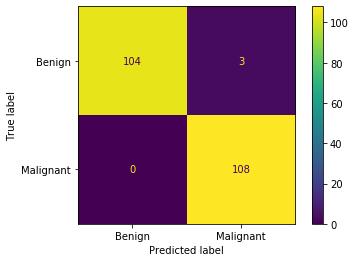

In [47]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(optimal_model, 
                      X_test_final, 
                      y_test, 
                      display_labels=["Benign","Malignant"])

It can be seen that the model classified 107 (104+3) observations as benign. This classification equates to 97.2% accuracy. 104/107 of those which were picked as benign were correctly classified. For the sensitivity, 108 daignoses where classified as malignant. All the 108 diagnoses were correctly classified, yielding a 100% classification accuracy i.e. (108/108)*100 = 100%



To Break this confusion matrix further we have:

##### Specificity aka True Negative Rate
104 True Negatives (TN): Diagnoses which are benign and correctly classifed as benign

3 False Positives (FP): Diagnoses which are benign but were wrongly classfied as malignant

Specifity = TN/TN+FP

Specificity = 104/104+3

Specifity = 0.972 or 97.2%


##### Sensitivity
108 True Positives (TP): Diagnoses which are malignant and correctly classifed as malignant

0 False Negatives (FN): Diagnoses which are malignant but were wrongly classfied as benign

Sensitivity = TP/TP+FN

Sensitivity = 108/108+0

Sensitivity = 100%

### Receiver Operating Characteristic(ROC) & Area Under The Curve (AUC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [48]:
#Predict the probabilities of our classes instead of predicting the target labels/classes
y_train_score = optimal_model.predict_proba(X_train_final)[:, 1]
y_test_score = optimal_model.predict_proba(X_test_final)[:, 1]

#### Probability of Predictions
A machine learning classification model can be used to predict the actual class of the data point directly or predict its probability of belonging to different classes. The latter gives us more control over the result. We can determine our own threshold to interpret the result of the classifier. This is sometimes more prudent than just building a completely new model!

Setting different thresholds for classifying positive class for data points will inadvertently change the Sensitivity and Specificity of the model. And one of these thresholds will probably give a better result than the others, depending on whether we are aiming to lower the number of False Negatives or False Positives.

In [49]:
from sklearn.metrics import (roc_curve, roc_auc_score, auc,classification_report)
auc_train = roc_auc_score(y_train, y_train_score)
auc_test = roc_auc_score(y_test, y_test_score)

In [50]:
#display AUC score for training and testing
print(f"""
      Training AUC: {auc_train}
      Testing AUC: {auc_test}""")


      Training AUC: 0.9999807098765432
      Testing AUC: 0.9942886812045691


In [51]:
#calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_test_score)
roc_auc = auc(fpr, tpr)

FPR tells us what proportion of the negative class got incorrectly classified.

TPR tells us what proportion of the positive class got correctly classified.

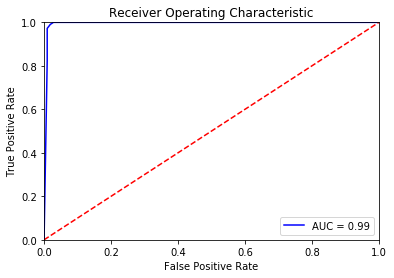

In [52]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

When AUC = 1, then the classifier is able to perfectly distinguish between all the benign and the malignant class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all benign as malignant, and all malignant as benign.


When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the malignant class values from the benign class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.


When AUC=0.5, then the classifier is not able to distinguish between malignant and benign class points. Meaning either the classifier is predicting random class or constant class for all the data points.

Our AUC score is 0.99 which means our model is a doing a stellar job in differentiating the two classes.The higher the AUC, the better the performance of the model at distinguishing between benign and and malignant classes. But, take this remark with a litle grain of salt. You will know why in a bit.

### Classification Report

In [53]:
yp = optimal_model.predict(X_test_final)

In [54]:
yp

array([1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.])

In [55]:
y_pred = []
for element in yp:
    if element > 0.5: #this threshold can be different
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       107
         1.0       0.97      1.00      0.99       108

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215



##### Precision
Precision talks about how precise/accurate our model is. Out of those predicted positive,how many of them are actual positive

Precision = TP/TP+FP


##### Recall  aka Sensitivity aka True Positive Rate
Recall calculates how many of the actual positives our model capture through labeling it as Positive (True Positive). Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. Like in this context. Every life matters. 🤷‍♂️

Recall = TP/TP+FN


##### F1 Score
F1 is a function of Precision and Recall. We need it to seek a balance between Precision and Recall. 

All in all, this will be a good model if we were interested in idenfying benign diagnoses. It would do a stellar job. However the 1% (based on the f1-score and accuracy) and 3% (recall score for the malignant class) misclassifications could be problamatic. Especially if we do not admistered timely treatements to patients who do have cancer but our model says they are just faking it 🙄. Cancer can be life threatening if not treated early and maliganant tumors can also metastasize to other parts of the body. This is the reason why you had to take the AUC score remarks with a grain of salt. 🙂


### Building a Predictive System

Lets export our dataset to a text file to use for our model testing. Remember that we dropped some features when doing feature selection? Great, then we have to export that last modified data frame. This is the same dataset we used for testing our model. Feel free to use your own for testing.

In [57]:
X_test_df['label'] = y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
X_test_df.to_csv('Breast Cancer Classfication Testing Dataset.txt', header=None, index=None, sep=',', mode='a')

In [60]:
input_data = (13.03,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1839,1.17,14.16,0.01343,0.01164,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1.]
The Breast Cancer is Benign


### Export the tested model to a pickle file

Model building is complete, lets export it to a pickle file to used by our python FastAPI sever, React Js and React Native Clients

In [61]:
import pickle
with open('breast_cancer_classification_model.pickle','wb') as f:
    pickle.dump(optimal_model,f)